In [31]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [32]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [33]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [34]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [35]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = 'normal',
               activation = 'relu'))

In [39]:
model.add(Dropout(0.5))

In [40]:
model.add(Dense(units = 1000,
               kernel_initializer = 'normal',
               activation = 'relu'))

In [41]:
model.add(Dropout(0.5))

In [42]:
model.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [44]:
train_history = model.fit(x=x_train_normalize,
                         y=y_train_onehot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
11s - loss: 0.3677 - acc: 0.8848 - val_loss: 0.1352 - val_acc: 0.9603
Epoch 2/10
11s - loss: 0.1592 - acc: 0.9505 - val_loss: 0.1007 - val_acc: 0.9693
Epoch 3/10
11s - loss: 0.1177 - acc: 0.9634 - val_loss: 0.0869 - val_acc: 0.9729
Epoch 4/10
11s - loss: 0.0976 - acc: 0.9697 - val_loss: 0.0850 - val_acc: 0.9739
Epoch 5/10
11s - loss: 0.0845 - acc: 0.9727 - val_loss: 0.0804 - val_acc: 0.9773
Epoch 6/10
11s - loss: 0.0750 - acc: 0.9766 - val_loss: 0.0759 - val_acc: 0.9753
Epoch 7/10
11s - loss: 0.0620 - acc: 0.9800 - val_loss: 0.0769 - val_acc: 0.9770
Epoch 8/10
11s - loss: 0.0587 - acc: 0.9817 - val_loss: 0.0816 - val_acc: 0.9772
Epoch 9/10
11s - loss: 0.0564 - acc: 0.9819 - val_loss: 0.0718 - val_acc: 0.9799
Epoch 10/10
11s - loss: 0.0519 - acc: 0.9832 - val_loss: 0.0814 - val_acc: 0.9788


In [45]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

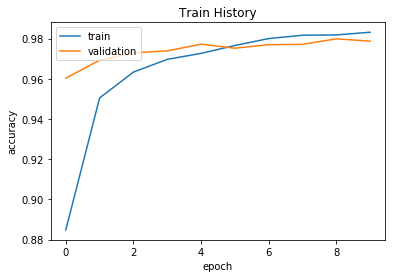

In [46]:
show_train_history(train_history, 'acc', 'val_acc')

In [47]:
score = model.evaluate(x_test_normalize, y_test_onehot)
print() #換行
print('accuracy=', score[1])

 9696/10000 [============================>.] - ETA: 0s
accuracy= 0.9796


In [48]:
prediction = model.predict_classes(x_test)

 9696/10000 [============================>.] - ETA: 0s

In [49]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [50]:
def plot_images_labels_prediction(images, labels, prediction, offset, length=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if length > 25: length = 25
    for i in range(0, length):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[offset], cmap='binary')
        title = "label=" + str(labels[offset])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[offset])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        offset += 1
    plt.show()

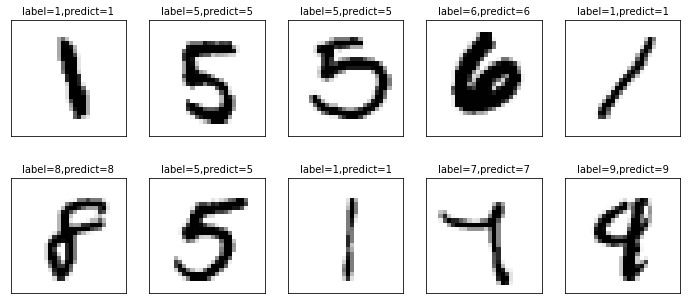

In [51]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, offset=350, length=10)

In [52]:
import pandas as pd
pd.crosstab(y_test_label, prediction,
           rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,1,0,0,1,1,1,1,0
1,0,1128,4,0,0,0,2,0,1,0
2,2,0,1024,0,1,0,2,2,1,0
3,2,0,12,989,0,1,0,2,4,0
4,1,2,3,0,967,0,4,0,0,5
5,2,0,1,20,2,847,13,1,5,1
6,2,2,0,1,3,1,949,0,0,0
7,1,9,14,1,0,0,0,996,0,7
8,1,0,7,5,3,5,3,5,942,3


In [53]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [54]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1082,5,3
1393,5,3
2035,5,3
2291,5,3
2559,5,3
2597,5,3
2810,5,3
3117,5,3


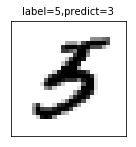

In [55]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, offset=2035, length=1)

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
